In [1]:
# Import necessary packages
import pandas as pd 
import csv
import os
from helper_functions import date_to_decimal_year, rain_predictor, grid_table, rain_table, volcano_rain_frame, rain_combine, create_map
from plot_functions import eruption_counter, annual_plotter, bar_plotter, rain_averager, by_strength, grid_search, p_values, cutoff_grid
from el_nino_functions import elnino_strengths, elnino_cleaner, nino_dict, nino_rain_compare, nino_separator, nino_distribution, nino_scatter, oni_type_precip, nino_by_strength
import numpy as np

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/GALAPAGOS_DATA'
folder_name = '/Volumes/T7Shield/Volcano/GetPrecipitation-main/data'

In [7]:
# Import tables
volcanic_events = pd.read_csv(os.path.join(folder_path, "erupt_2024.csv"))

#rainfall = pd.read_csv(os.path.join(folder_path, "update_2024.csv"))

rainfall = pd.read_csv(os.path.join(folder_path, "isabela_2024.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

oni = pd.read_csv(os.path.join(folder_path, "oni_2024.csv"))

In [8]:
#sites_dict = {'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.55, -.35, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.35, -.95, 'Cerro Azul')} # Long/lat pairs must exist in rainfall data
sites_dict = {'Isabela': ('NaN', 'NaN', 'Isabela')} # Long/lat pairs must exist in rainfall data
quantiles = 3 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
quant_range = [20, 25, 30, 35, 40, 45, 50]
roll_range = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]
# quant_range = [33]
# roll_range = [90]

log_flag = True # If true, applies a log scaling to the data
by_season = False # Make true if you want to consider rainfall quantiles yearly, or False to consider rainfall quantiles across the entire date range
compare_site = ayora  # Choose ayora or bellavista to compare rainfall to
print_summary = False # Make true if you want to see summary of regression

# Uncomment below to use rain predictor gauge location. (For analyses of eruptions between 1964 and 2000)
rainfall = rain_combine(rainfall, sites_dict, compare_site, rolling_number, print_summary=False, center=False)

elninos = nino_dict(oni, rainfall)

#nino_compare_frame = nino_rain_compare(oni, rainfall, sites_dict, rolling_number)


In [15]:
volcanic_events.drop(index=volcanic_events.index, inplace=True)

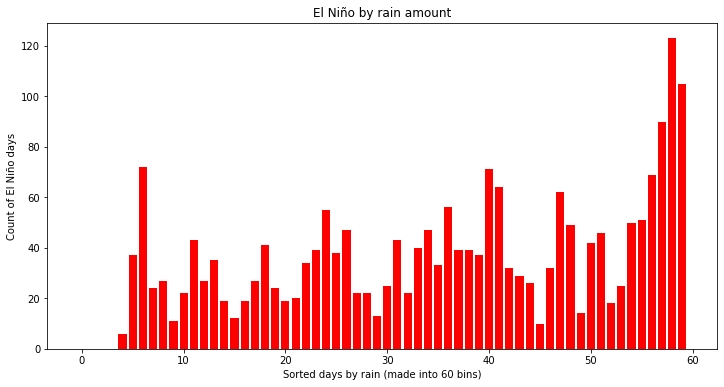

In [5]:
nino_by_strength(rainfall, elninos, rolling_number)

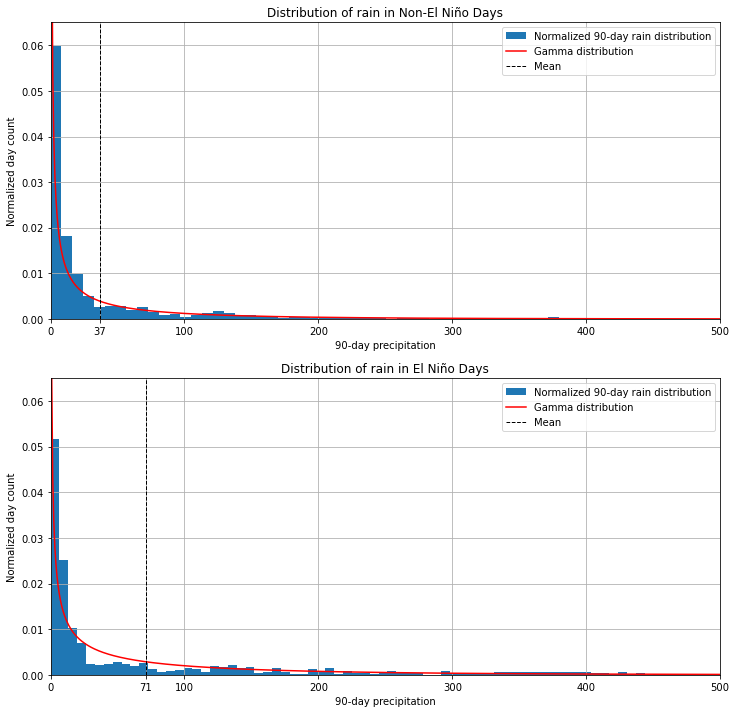

(      Unnamed: 0        Date  Precipitation Longitude Latitude    Decimal  \
 89           NaN  1965-03-30      -0.062963       NaN      NaN  1965.2411   
 90           NaN  1965-03-31      -0.062963       NaN      NaN  1965.2438   
 91           NaN  1965-04-01      -0.062963       NaN      NaN  1965.2466   
 92           NaN  1965-04-02      -0.062963       NaN      NaN  1965.2493   
 93           NaN  1965-04-03      -0.062963       NaN      NaN  1965.2521   
 ...          ...         ...            ...       ...      ...        ...   
 8686       324.0  2024-03-20       0.342720       NaN      NaN  2024.2164   
 8687       325.0  2024-03-21      46.892713       NaN      NaN  2024.2192   
 8688       326.0  2024-03-22       0.730256       NaN      NaN  2024.2219   
 8689       327.0  2024-03-23       0.494999       NaN      NaN  2024.2247   
 8690       328.0  2024-03-24       5.266162       NaN      NaN  2024.2274   
 
             roll        cumsum  
 89     12.297460     -0.062

In [8]:
nino_distribution(rainfall, elninos, 'weak nino', rolling_number)

In [57]:
nino_frame = pd.DataFrame()
nino_frame['Start'] = [i[2] for i in elninos['weak nino']]
nino_frame['End'] = [i[3] for i in elninos['weak nino']]
nino_frame['Total rain'] = [round(ninos['Precipitation'][(ninos['Decimal'] >= i[0]) & (ninos['Decimal'] <= i[1])].sum(),2) for i in elninos['weak nino']]
nino_frame['Average daily rain'] = [round(ninos['Precipitation'][(ninos['Decimal'] >= i[0]) & (ninos['Decimal'] <= i[1])].mean(),2) for i in elninos['weak nino']]

/Users/jonathanquartin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


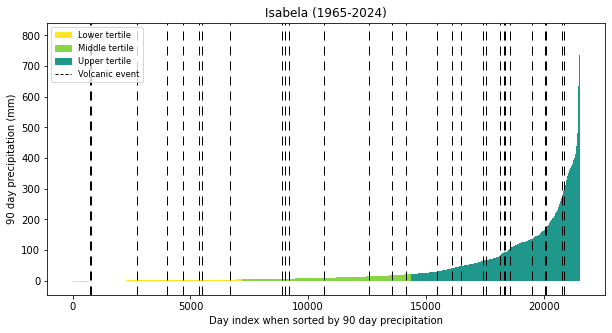

In [32]:
all_rain, event_rain = by_strength(sites_dict, volcanic_events, rainfall, quantiles, rolling_number, log=False, elninos=None, recur=False)

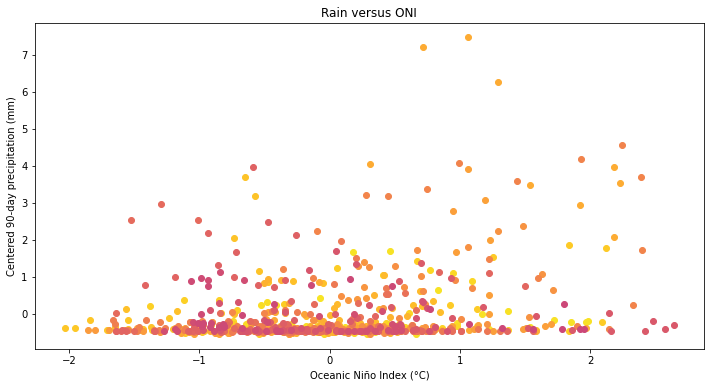

In [5]:
nino_scatter(oni, rainfall, rolling_number)

25°C


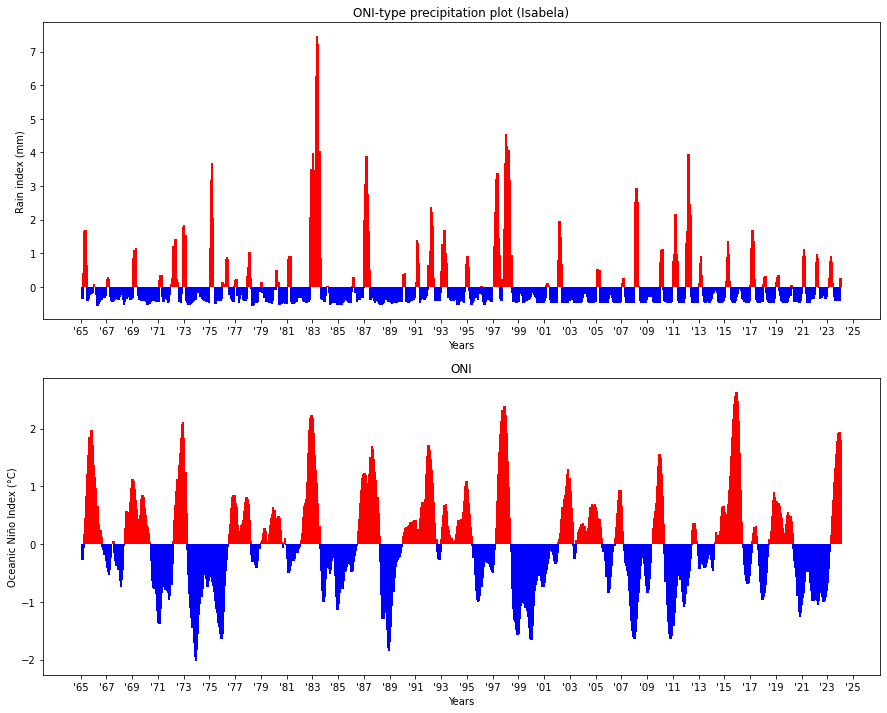

In [5]:
oni_type_precip(oni, rainfall, rolling_number)

[0.         0.         0.         ... 6.69179373 6.69344667 6.70276205]


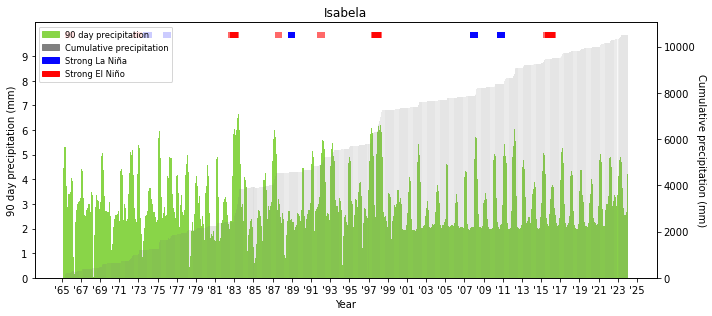

In [14]:
volcanic_events = volcanic_events.drop(volcanic_events.index)

bar_plotter(sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos, False, True, True)

In [6]:
frame = rain_table(sites_dict, volcanic_events, rainfall, roll_range, start=None, end=None, by_season=False, recur=False)

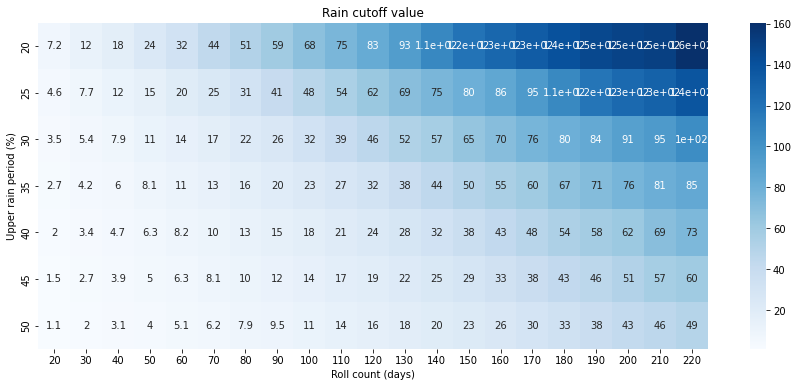

In [7]:
frame = cutoff_grid(sites_dict, volcanic_events, rainfall, quant_range, roll_range, by_season=False, recur=False)

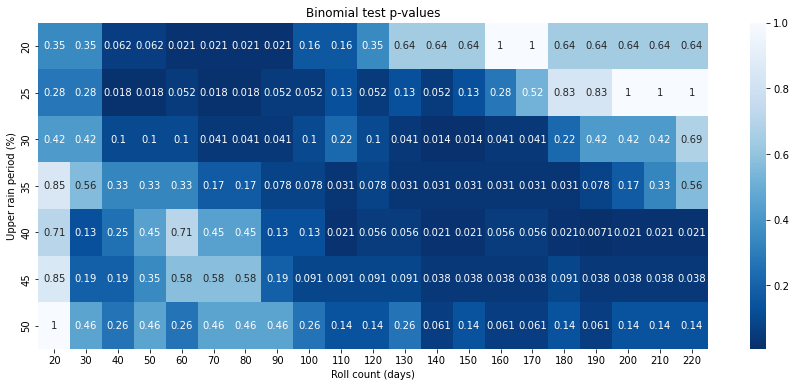

In [23]:
frame = p_values(sites_dict, volcanic_events, rainfall, quant_range, roll_range, by_season=False, recur=False)

In [10]:
frame = grid_table(sites_dict, volcanic_events, rainfall, quant_range, roll_range, by_season=False, recur=False)

/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/helper_functions.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_frame[(quant_range[quant], roll_range[roll])] = yeses
/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/helper_functions.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_frame[(quant_range[quant], roll_range[roll])] = yeses
/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/helper_functions.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is u

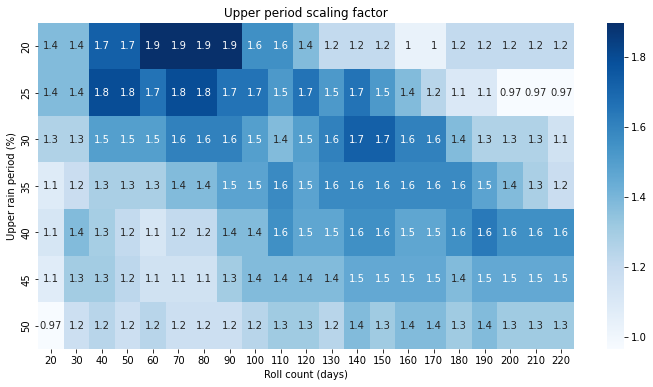

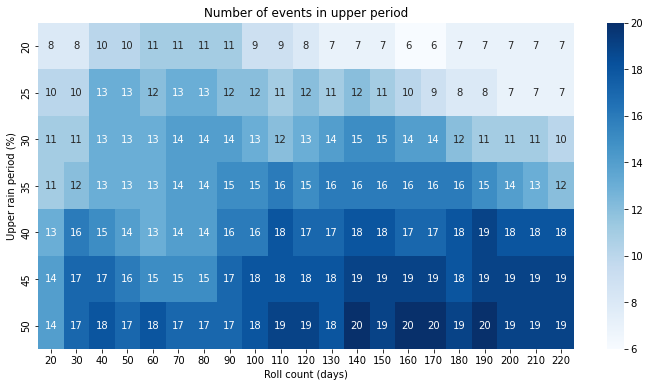

array([[1.379, 1.379, 1.724, 1.724, 1.897, 1.897, 1.897, 1.897, 1.552,
        1.552, 1.379, 1.207, 1.207, 1.207, 1.034, 1.034, 1.207, 1.207,
        1.207, 1.207, 1.207],
       [1.379, 1.379, 1.793, 1.793, 1.655, 1.793, 1.793, 1.655, 1.655,
        1.517, 1.655, 1.517, 1.655, 1.517, 1.379, 1.241, 1.103, 1.103,
        0.966, 0.966, 0.966],
       [1.264, 1.264, 1.494, 1.494, 1.494, 1.609, 1.609, 1.609, 1.494,
        1.379, 1.494, 1.609, 1.724, 1.724, 1.609, 1.609, 1.379, 1.264,
        1.264, 1.264, 1.149],
       [1.084, 1.182, 1.281, 1.281, 1.281, 1.379, 1.379, 1.478, 1.478,
        1.576, 1.478, 1.576, 1.576, 1.576, 1.576, 1.576, 1.576, 1.478,
        1.379, 1.281, 1.182],
       [1.121, 1.379, 1.293, 1.207, 1.121, 1.207, 1.207, 1.379, 1.379,
        1.552, 1.466, 1.466, 1.552, 1.552, 1.466, 1.466, 1.552, 1.638,
        1.552, 1.552, 1.552],
       [1.073, 1.303, 1.303, 1.226, 1.149, 1.149, 1.149, 1.303, 1.379,
        1.379, 1.379, 1.379, 1.456, 1.456, 1.456, 1.456, 1.379, 1.456

In [8]:
grid_search(sites_dict, volcanic_events, rainfall, quant_range, roll_range, by_season=False, recur=False)

We look at rolling averages of rainfall at each volcano site. We group dates at each volcano into quantiles based on the rolling rain averages. In gray, we've included the cumulative precipitation.

KeyboardInterrupt: 

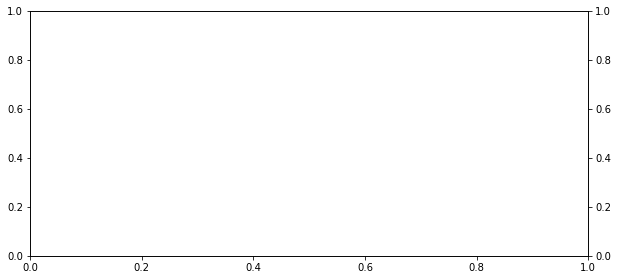

In [19]:
bar_plotter(sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos)

1965 2025
[1967.6027 1968.3863 1972.4247 1973.937  1977.2219 1978.6    1979.0767
 1979.8658 1981.5808 1982.6548 1984.2438 1988.7041 1991.2959 1995.0658
 1998.0274 1998.7041 2005.2877 2005.3616 2005.8055 2008.4082 2009.2712
 2015.3945 2017.674  2017.1863 2018.4548 2018.4822 2020.0301 2022.0137
 2024.1671]


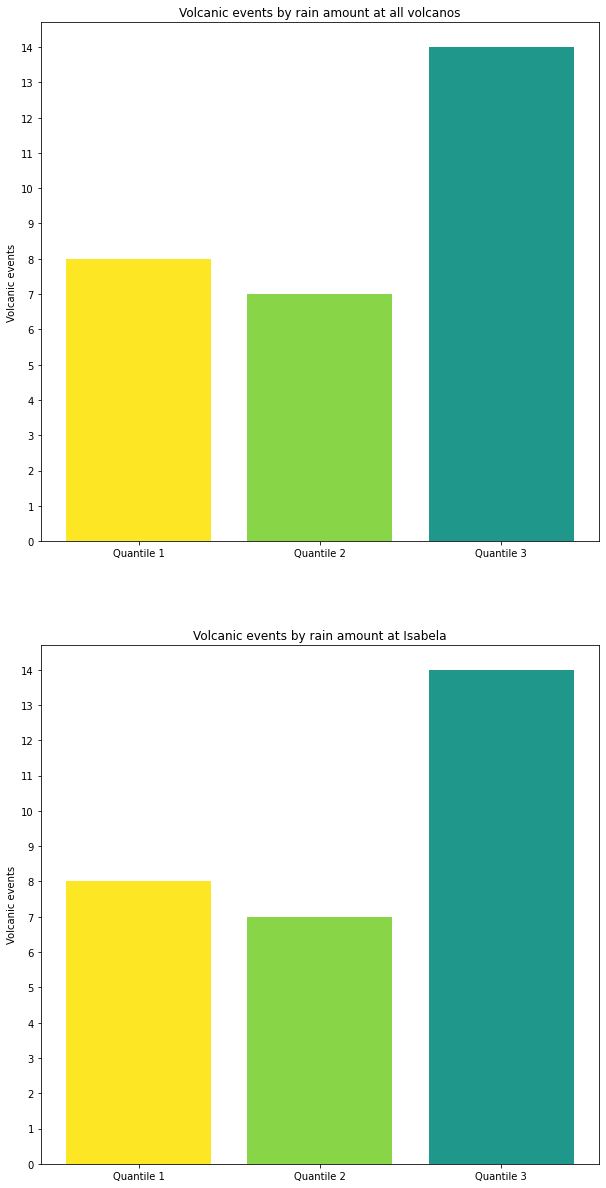

In [14]:
vals = eruption_counter(sites_dict, volcanic_events, rainfall, quantiles, rolling_number, by_season)

0.15889999999990323 0.49319999999988795


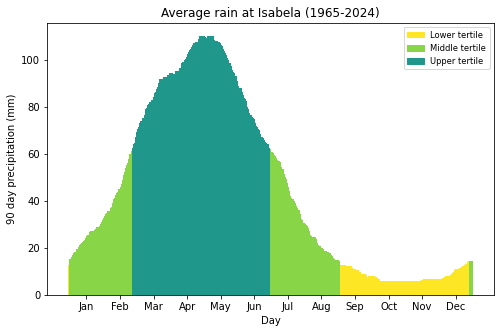

In [31]:
frame = rain_averager(rainfall, sites_dict, volcanic_events, quantiles, rolling_number)

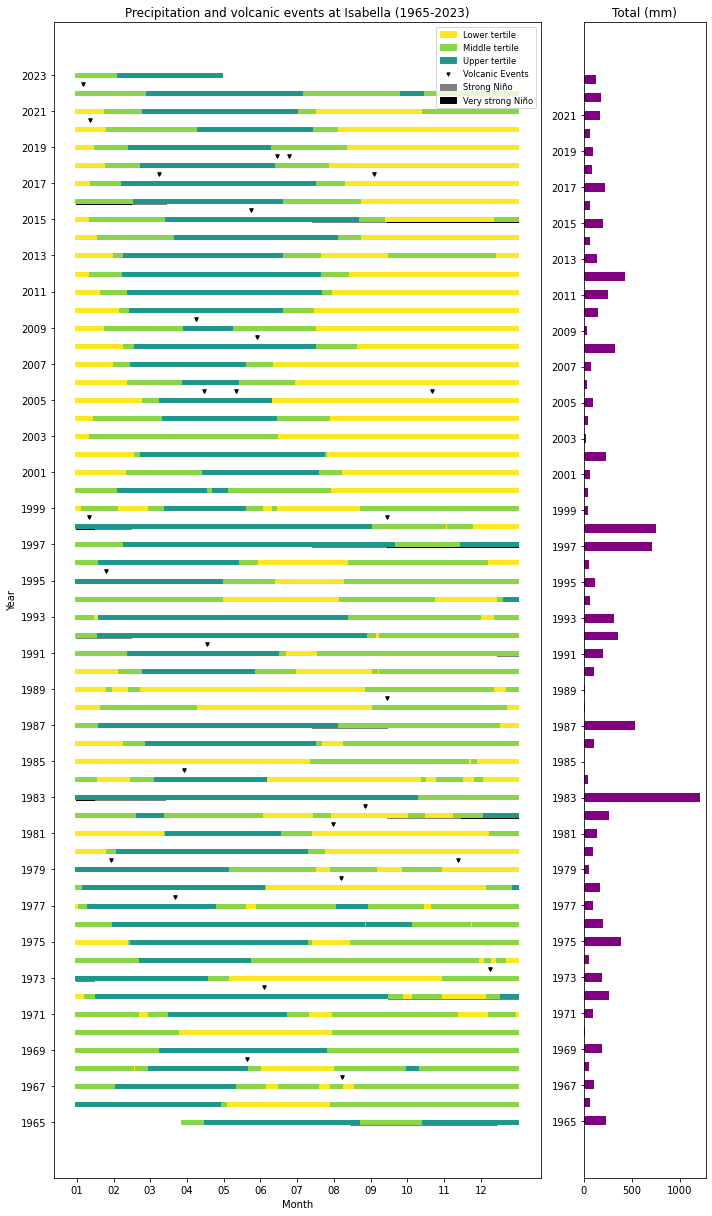

In [34]:
annual_plotter(sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos)